In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
# from keras.models import Sequential
# from keras.layers import Dense

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import string

#### import the Comedians vector

In [4]:
def normalize_text(text):
    # Lowercase every words
    text = text.lower()
    # Get rid of the punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Get rid of these specific punctuations
    text = re.sub('[‘’“”…]', '', text)
    # Get rid of '\n'
    text = re.sub('\n', '', text)
    return text

In [5]:
comedians_vector ={'bill burr': [0.06870229, 0.19083969, 0.40458015, 0.33587786],
        'jim jefferies': [0.05806452, 0.4       , 0.18064516, 0.36129032],
        'dave chappelle': [0.19369369, 0.33333333, 0.15765766, 0.31531532],
        'andy woodhull': [0.        , 0.2962963 , 0.07407407, 0.62962963],
        'ramy youssef': [0.        , 0.58974359, 0.30769231, 0.1025641 ],
        'chris rock': [0.        , 0.02564103, 0.25641026, 0.71794872],
        'jack whitehall': [0.      , 0.28125 , 0.046875, 0.671875],
        'vir das': [0.        , 0.11111111, 0.33333333, 0.55555556],
        'mark normand': [0.        , 0.06382979, 0.5106383 , 0.42553191],
        'bert kreischer': [0.        , 0.67142857, 0.05714286, 0.27142857],
        "chris d'elia": [0.        , 0.21212121, 0.42424242, 0.36363636],
        'jimmy o. yang': [0.        , 0.32075472, 0.01886792, 0.66037736],
        'hannah gadsby': [0.        , 0.14754098, 0.2295082 , 0.62295082],
        'joe rogan': [0.        , 0.11267606, 0.54929577, 0.33802817],
        'marc maron': [0.        , 0.23404255, 0.63829787, 0.12765957],
        'whitney cummings': [0.        , 0.14285714, 0.5952381 , 0.26190476],
        'aziz ansari': [0.        , 0.33898305, 0.3220339 , 0.33898305],
        'neal brennan': [0.        , 0.29508197, 0.29508197, 0.40983607],
        'george lopez': [0.        , 0.07142857, 0.42857143, 0.5       ],
        'kenny sebastian': [0. , 0.3, 0.3, 0.4],
        'ronny chieng': [0.      , 0.078125, 0.03125 , 0.890625],
        'tom segura': [0.        , 0.46478873, 0.40140845, 0.13380282],
        'iliza shlesinger': [0.        , 0.14893617, 0.54609929, 0.30496454],
        'pete davidson': [0.        , 0.55172414, 0.27586207, 0.17241379],
        'urzila carlson': [0.        , 0.11111111, 0.75      , 0.13888889],
        'trevor noah': [0.        , 0.46153846, 0.15384615, 0.38461538],
        'sebastian maniscalco': [0.      , 0.328125, 0.15625 , 0.515625],
        'patton oswalt': [0.        , 0.40909091, 0.25      , 0.34090909],
        'kevin hart': [0.        , 0.35227273, 0.29545455, 0.35227273],
        'tiffany haddish': [0.        , 0.29166667, 0.08333333, 0.625     ],
        'roy wood jr.': [0.        , 0.04651163, 0.10465116, 0.84883721],
        'michael mcintyre': [0.        , 0.22222222, 0.26666667, 0.51111111],
        'amy schumer': [0.        , 0.43283582, 0.37313433, 0.19402985],
        'arsenio hall': [0.        , 0.35483871, 0.16129032, 0.48387097],
        'jo koy': [0.        , 0.41666667, 0.14285714, 0.44047619],
        'jerry seinfeld': [0.        , 0.01351351, 0.31081081, 0.67567568],
        'michelle wolf': [0.        , 0.01724138, 0.5       , 0.48275862],
        'eric andre': [0.        , 0.11764706, 0.01960784, 0.8627451 ],
        'hasan minhaj': [0.        , 0.16129032, 0.0483871 , 0.79032258],
        'russell peters': [0.        , 0.24561404, 0.33333333, 0.42105263]}

In [6]:
len(comedians_vector)

40

In [7]:
#get the comedians type
comedians_type = {}
for key,value in comedians_vector.items():
    for i in range(4):
        if max(value) == value[i]:
            comedians_type[key] = i

#### get the useful user_comedian_matrix

In [8]:
user_comedian_matrix = pd.read_pickle('./user_comedian_matrix_OriginalPolarity.pkl')
user_comedian_matrix.columns = map(str.lower,user_comedian_matrix.columns)
user_comedian_matrix.index = map(str.lower,user_comedian_matrix.index)
user_comedian_matrix

,ramy youssef,andy woodhull,amy schumer,arsenio hall,aziz ansari,bert kreischer,bill burr,chris d'elia,chris rock,dave chappelle,...,ronny chieng,roy wood jr.,russell peters,sebastian maniscalco,tiffany haddish,tom segura,trevor noah,urzila carlson,vir das,whitney cummings
a b,0.191429,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
adedotun akande,NaN,0.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.4,NaN,-0.1625,NaN,NaN,NaN,NaN,NaN,NaN
anton nym,NaN,0.68099,NaN,NaN,NaN,0,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lydia waweru-morgan,NaN,-0.2375,NaN,0.65,NaN,0.488281,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jennifer bates,NaN,0.671875,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
camthedestroyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jay jay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.155,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN
cynthia copland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.3,NaN,NaN,NaN,NaN,NaN
comedy central stand-up\n\n\n\n \n comedy central stand-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.268182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5


#### get user vector

In [9]:
#get the compplete user_comedian_matrix
user_comedian_matrix_completion = pd.read_csv('final_user_comdeian.csv')
user_comedian_matrix_completion = user_comedian_matrix_completion.rename(columns={"Unnamed: 0":"User"})
user_comedian_matrix_completion.set_index(["User"], inplace=True)
user_comedian_matrix_completion

,Jo Koy,Sebastian Maniscalco,Eric Andre,Bill Burr,Jim Jefferies,Hannah Gadsby,Dave Chappelle,Michelle Wolf,Chris D'Elia,George Lopez,...,Russell Peters,Chris Rock,Patton Oswalt,Arsenio Hall,Ramy Youssef,Aziz Ansari,Roy Wood Jr.,Urzila Carlson,Whitney Cummings,Iliza Shlesinger
User,,,,,,,,,,,,,,,,,,,,,
Taymaa a.,0.598734,0.648861,0.673545,0.627313,0.667700,0.647551,0.583295,0.546004,0.642717,0.570910,...,0.472585,0.610839,0.606649,0.732628,0.613747,0.674650,0.619874,0.744348,0.672147,0.710446
Juman B,0.718724,0.778897,0.808528,0.753030,0.801511,0.777325,0.700191,0.655426,0.771521,0.685324,...,0.567294,0.733255,0.728225,0.879452,0.736745,0.809855,0.744100,0.893520,0.806849,0.852824
sofya andrei,0.582223,0.630968,0.654971,0.610013,0.649286,0.629694,0.567210,0.530947,0.624992,0.555166,...,0.459553,0.593994,0.589919,0.712425,0.596821,0.656046,0.602779,0.723821,0.653611,0.690854
Blaise Tangney,0.543908,0.589445,0.611869,0.569870,0.606558,0.588255,0.529883,0.496006,0.583863,0.518632,...,0.429311,0.554905,0.551098,0.665542,0.557546,0.612873,0.563112,0.676188,0.610598,0.645390
liban wkb,0.590148,0.639557,0.663887,0.618317,0.658125,0.638266,0.574931,0.538174,0.633500,0.562723,...,0.465808,0.602080,0.597949,0.722123,0.604946,0.664976,0.610985,0.733674,0.662508,0.700258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thehoodwinYT,0.503640,0.545805,0.566569,0.527679,0.561651,0.544703,0.490653,0.459284,0.540636,0.480235,...,0.397526,0.513822,0.510297,0.616268,0.516268,0.567498,0.521422,0.626126,0.565392,0.597608
Maple Syrup,0.572464,0.620392,0.643993,0.599788,0.638403,0.619139,0.557702,0.522047,0.614517,0.545861,...,0.451850,0.584038,0.580031,0.700483,0.586818,0.645049,0.592676,0.711689,0.642655,0.679274
Cristian Proust,0.552355,0.598599,0.621371,0.578720,0.615978,0.597391,0.538112,0.503709,0.592930,0.526686,...,0.435978,0.563522,0.559656,0.675877,0.566205,0.622391,0.571857,0.686689,0.620081,0.655413


In [10]:
user_vector = {}
for i in range(len(user_comedian_matrix_completion)):
    temp_name = (user_comedian_matrix_completion.index)[i].lower()
    user_vector[temp_name] = [0,0,0,0]
    num_list = [0,0,0,0]
    for j in range(user_comedian_matrix_completion.shape[1]):
        temp_com_name = list(user_comedian_matrix_completion)[j].lower()
        if temp_com_name in comedians_vector:
            temp_index = comedians_type[temp_com_name]
            user_vector[temp_name][temp_index] += user_comedian_matrix_completion.iloc[i,j]
            num_list[temp_index] += 1
    for k in range(4):
        if  num_list[k] != 0:
            user_vector[temp_name][k] /= num_list[k]
user_vector

{'taymaa a.': [0, 0.6439214576747667, 0.6600174058126008, 0.6357627022523373],
 'juman b': [0, 0.7729673871065136, 0.7922890649708155, 0.7631735655375145],
 'sofya andrei': [0,
  0.6261639996935697,
  0.6418160689711508,
  0.6182302387248361],
 'blaise tangney': [0,
  0.5849575544451935,
  0.5995795962283386,
  0.5775458964512906],
 'liban wkb': [0, 0.634687729196743, 0.6505528640685652, 0.6266459689938256],
 'karyl kidd': [0, 0.7724464253093867, 0.7917550808182936, 0.7626592045452475],
 'praveen rajendran': [0,
  0.7096673040483724,
  0.7274066851249521,
  0.7006755211282417],
 'chirpy n sleepy': [0,
  0.6177952294077567,
  0.633238106568982,
  0.6099675042748143],
 'mayan ahmed': [0,
  0.6411116338186525,
  0.6571373454726339,
  0.6329884800450715],
 'angshuman saikia': [0,
  0.5751595709130991,
  0.5895366948838181,
  0.567872057487324],
 'anjali singh': [0,
  0.5255806820715414,
  0.5387184946106971,
  0.5189213539987357],
 'kashiho kasugano': [0,
  0.5503350167936096,
  0.56409160

In [11]:
len(user_vector)

1069

#### get the train set and test set

In [12]:
def normalize_text(text):
    # Lowercase every words
    text = text.lower()
    # Get rid of the punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Get rid of these specific punctuations
    text = re.sub('[‘’“”…]', '', text)
    # Get rid of '\n'
    text = re.sub('\n', '', text)
    return text

In [13]:
# train_set = pd.read_csv('./training_set.csv')
# train_set = train_set[{"Name","Comedian"}]
# test_set = pd.read_csv('./test_set.csv')
# test_set = test_set[{"Name","Comedian"}]

In [14]:
# Training set
X_train_df = pd.read_pickle('X_train.pkl')
Y_train_df = pd.read_pickle('Y_train.pkl')
train_set = pd.concat([X_train_df, Y_train_df], axis=1)
train_set.Name = train_set.Name.apply(normalize_text)
train_set.Comedian = train_set.Comedian.apply(normalize_text)
train_set

,Name,Comedian,Rating
0,respekt,marc maron,0.250000
1,mais abdullatif,ramy youssef,0.600000
2,benito ramirez,roy wood jr,0.541667
3,quarantinewhile,jo koy,0.633333
4,its me,tom segura,0.700000
...,...,...,...
7252,j garcia,iliza shlesinger,0.424242
7253,kevin,sebastian maniscalco,1.000000
7254,simi shrivastava,kevin hart,0.612500
7255,robbie bryan wang,sebastian maniscalco,0.483333


In [15]:
# Testing set
X_test_df = pd.read_pickle('X_test.pkl')
Y_test_df = pd.read_pickle('Y_test.pkl')
test_set = pd.concat([X_test_df, Y_test_df], axis=1)
test_set.Name = test_set.Name.apply(normalize_text)
test_set.Comedian = test_set.Comedian.apply(normalize_text)
test_set

,Name,Comedian,Rating
0,nik d,kenny sebastian,1.000000
1,mr 79,chris rock,0.571667
2,satish rengarajan,joe rogan,0.400000
3,maliah h,iliza shlesinger,0.450000
4,goliath3719,whitney cummings,0.066667
...,...,...,...
1810,halsey xxxo,urzila carlson,0.200000
1811,silver galt,mark normand,0.833333
1812,leo,arsenio hall,1.000000
1813,darren neil,chris rock,0.500000


In [16]:
user_vector
users = pd.DataFrame(user_vector).T.reset_index()
users.index = users["index"].apply(normalize_text)
users = users.drop("index",axis = 1)
users.head()

,0,1,2,3
index,,,,
taymaa a,0.0,0.643921,0.660017,0.635763
juman b,0.0,0.772967,0.792289,0.763174
sofya andrei,0.0,0.626164,0.641816,0.618230
blaise tangney,0.0,0.584958,0.599580,0.577546
liban wkb,0.0,0.634688,0.650553,0.626646


In [17]:
comedians_vector 
comedians = pd.DataFrame(comedians_vector).T.reset_index()
comedians.index = comedians["index"].apply(normalize_text)
comedians = comedians.drop("index",axis = 1)
comedians.head()

,0,1,2,3
index,,,,
bill burr,0.068702,0.190840,0.404580,0.335878
jim jefferies,0.058065,0.400000,0.180645,0.361290
dave chappelle,0.193694,0.333333,0.157658,0.315315
andy woodhull,0.000000,0.296296,0.074074,0.629630
ramy youssef,0.000000,0.589744,0.307692,0.102564


In [18]:
train_data = pd.DataFrame(columns = ["prefer1","prefer2","prefer3","prefer4","style1","style2","style3","style4","polarity"])
for i in range(len(train_set)):
    temp_com_name = train_set.iloc[i,1]
    temp_user_name = train_set.iloc[i,0]
    if temp_com_name in comedians.index and temp_user_name in users.index:
        temp_com_list = comedians.loc[temp_com_name].values
        temp_user_list = users.loc[temp_user_name].values
        train_data = train_data.append({"prefer1":temp_user_list[0], "prefer2":temp_user_list[1],
                                        "prefer3": temp_user_list[2], "prefer4": temp_user_list[3], 
                                        "style1":temp_com_list[0],"style2":temp_com_list[1],
                                        "style3":temp_com_list[2],"style4":temp_com_list[3],
#                                         "polarity":user_comedian_matrix.loc[temp_user_name,temp_com_name]},
                                        "polarity":train_set.iloc[i,2]},
                                       ignore_index=True)
train_data

,prefer1,prefer2,prefer3,prefer4,style1,style2,style3,style4,polarity
0,0.0,0.761288,0.780318,0.751643,0.0,0.234043,0.638298,0.127660,0.250000
1,0.0,0.465434,0.477068,0.459536,0.0,0.589744,0.307692,0.102564,0.600000
2,0.0,0.634255,0.650109,0.626218,0.0,0.046512,0.104651,0.848837,0.541667
3,0.0,0.646216,0.662370,0.638029,0.0,0.416667,0.142857,0.440476,0.633333
4,0.0,0.620305,0.635810,0.612445,0.0,0.464789,0.401408,0.133803,0.700000
...,...,...,...,...,...,...,...,...,...
7252,0.0,0.399441,0.409426,0.394380,0.0,0.148936,0.546099,0.304965,0.424242
7253,0.0,0.567559,0.581746,0.560367,0.0,0.328125,0.156250,0.515625,1.000000
7254,0.0,0.597693,0.612634,0.590120,0.0,0.352273,0.295455,0.352273,0.612500
7255,0.0,0.619700,0.635190,0.611848,0.0,0.328125,0.156250,0.515625,0.483333


In [19]:
# users = pd.DataFrame(user_vector).T.reset_index()
# comedians = pd.DataFrame(comedians_vector).T.reset_index()
# merge_df = users.merge(test_set,left_on = "index",right_on = "Name")
# merge_df = comedians.merge(merge_df,left_on = "index", right_on = "Comedian")
# test_data = merge_df[["0_y","1_y","2_y","3_y","0_x","1_x","2_x","3_x","Rating"]]
# test_data.columns = ["prefer1","prefer2","prefer3","prefer4","style1","style2","style3","style4","polarity"]
# test_data

In [20]:
test_data = pd.DataFrame(columns = ["prefer1","prefer2","prefer3","prefer4","style1","style2","style3","style4","polarity"])
for i in range(len(test_set)):
    temp_com_name = test_set.iloc[i,1]
    temp_user_name = test_set.iloc[i,0]
    if temp_com_name in comedians.index and temp_user_name in users.index:
        temp_com_list = comedians.loc[temp_com_name].values
        temp_user_list = users.loc[temp_user_name].values
        test_data = test_data.append({"prefer1":temp_user_list[0], "prefer2":temp_user_list[1],
                                        "prefer3": temp_user_list[2], "prefer4": temp_user_list[3], 
                                        "style1":temp_com_list[0],"style2":temp_com_list[1],
                                        "style3":temp_com_list[2],"style4":temp_com_list[3],
#                                         "polarity":user_comedian_matrix.loc[temp_user_name,temp_com_name]},
                                        "polarity":test_set.iloc[i,2]},
                                       ignore_index=True)
test_data

,prefer1,prefer2,prefer3,prefer4,style1,style2,style3,style4,polarity
0,0.0,0.398008,0.407957,0.392965,0.0,0.300000,0.300000,0.400000,1.000000
1,0.0,0.617085,0.632510,0.609266,0.0,0.025641,0.256410,0.717949,0.571667
2,0.0,0.645610,0.661748,0.637429,0.0,0.112676,0.549296,0.338028,0.400000
3,0.0,0.584015,0.598613,0.576615,0.0,0.148936,0.546099,0.304965,0.450000
4,0.0,0.539359,0.552842,0.532525,0.0,0.142857,0.595238,0.261905,0.066667
...,...,...,...,...,...,...,...,...,...
1810,0.0,0.518747,0.531714,0.512174,0.0,0.111111,0.750000,0.138889,0.200000
1811,0.0,0.676851,0.693770,0.668275,0.0,0.063830,0.510638,0.425532,0.833333
1812,0.0,0.716491,0.734401,0.707412,0.0,0.354839,0.161290,0.483871,1.000000
1813,0.0,0.564319,0.578425,0.557169,0.0,0.025641,0.256410,0.717949,0.500000


In [21]:
test_data["polarity"] = test_data["polarity"].apply(lambda x : 1 if x >= 0.5 else 0)
train_data["polarity"] = train_data["polarity"].apply(lambda x : 1 if x >= 0.5 else 0)

In [22]:
X_train = train_data.iloc[:,0:8]
X_test = test_data.iloc[:,0:8]
y_train = train_data["polarity"]
y_test = test_data["polarity"]

In [23]:
len(X_train)

7257

In [24]:
len(X_test)

1815

In [25]:
models = []
models.append(('RD', DummyClassifier(strategy='uniform')))
models.append(('LR',make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))))
models.append(('XGB',make_pipeline(StandardScaler(), XGBClassifier())))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=[100,100],activation='logistic')))

In [26]:
names = []
results = []
means = []
sdevs = []
scoring = 'accuracy'

In [27]:
for name,model in models:
    cv_method = StratifiedKFold(n_splits = 30)
    cv_results = cross_val_score(model,X_train,y_train,cv=cv_method,scoring=scoring)
    results.append(cv_results)
    means.append(cv_results.mean())
    sdevs.append(cv_results.std())
    names.append(name)
    print(f"{name} done.")

RD done.
LR done.
LDA done.
KNN done.
DT done.
RF done.
NB done.
SVM done.
XGB done.
MLP done.


In [28]:
df1 = pd.DataFrame()
df1['name'] = names
df1[f'mean {scoring}'] = means
df1[f'{scoring} std dev'] = sdevs
df1

,name,mean accuracy,accuracy std dev
0,RD,0.505579,0.029272
1,LR,0.707866,0.017250
2,LDA,0.707867,0.017429
3,KNN,0.683612,0.023327
4,DT,0.615960,0.030358
5,RF,0.640072,0.023506
6,NB,0.670786,0.030251
7,SVM,0.706627,0.012711
8,XGB,0.711450,0.016835
9,MLP,0.706624,0.016355


Text(0, 0.5, 'Test accuracy Rate')

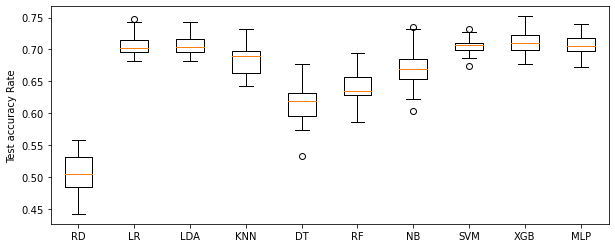

In [29]:
plt.figure(figsize=(10,4))
plt.boxplot(results)
plt.xticks(range(1,11),names)
plt.ylabel(f'Test {scoring} Rate')

### t-score evaluation

In [30]:
from scipy.stats import ttest_ind as ttest

In [31]:
best = results[8] #XGB
best

array([0.7107438 , 0.73966942, 0.7231405 , 0.7107438 , 0.69834711,
       0.69421488, 0.73140496, 0.68595041, 0.73140496, 0.75206612,
       0.70247934, 0.7231405 , 0.69008264, 0.71487603, 0.72727273,
       0.71487603, 0.68181818, 0.67768595, 0.7107438 , 0.7107438 ,
       0.71487603, 0.71487603, 0.69421488, 0.72727273, 0.72727273,
       0.7107438 , 0.69834711, 0.70539419, 0.70954357, 0.70954357])

In [32]:
for r, n in zip(results, names):
    # The best model
    if n == 'XGB':
        continue
    print(f"XGB vs. {n}: p-value = {ttest(best, r)[0]}")

XGB vs. RD: p-value = 32.831192121883134
XGB vs. LR: p-value = 0.800619410493323
XGB vs. LDA: p-value = 0.7961202854491364
XGB vs. KNN: p-value = 5.211061704287136
XGB vs. DT: p-value = 14.813421698326604
XGB vs. RF: p-value = 13.294115115922919
XGB vs. NB: p-value = 6.325253514648788
XGB vs. SVM: p-value = 1.2311196224902137
XGB vs. MLP: p-value = 1.1072653136814767


## Hyperparameter tuning

In [33]:
def evaluate(model, x, y):    
     #Predict training set:
    y_pred = model.predict(x)
        
    #Print model report:
    df = pd.DataFrame(confusion_matrix(y, y_pred), index=[0, 1], columns=[0, 1])
    
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print(f"Precision = {tp/(tp+fp):0.3f}")
    print(f"Recall = {tp/(tp+fn):0.3f}")
    print(f"Accuracy = {(tn+tp)/len(y)}")
    
    return df

#### XGB

In [34]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [35]:
def modelfit(alg, x, y, param = None):
    
    if param is not None:
        grid_search = GridSearchCV(alg, param, scoring='accuracy',cv=None,n_jobs=-1)
        result = grid_search.fit(x, y)
        best = grid_search.best_estimator_
    else:
        result = alg.fit(x, y)
        best = alg
        
    return best

In [36]:
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 n_jobs=-1,
 scale_pos_weight=1,
 seed=27)
model = modelfit(xgb1, X_train, y_train)

In [37]:
evaluate(model, X_train, y_train)

Precision = 0.741
Recall = 0.963
Accuracy = 0.7413531762436268


,0,1
0,528,1693
1,184,4852


In [38]:
evaluate(model, X_test, y_test)

Precision = 0.712
Recall = 0.920
Accuracy = 0.6837465564738292


,0,1
0,75,472
1,102,1166


In [39]:
xgb_pred = model.predict(X_test)
xgb_pred
# pickle.dump(xgb_pred, open('scenario1_xgb_pred.pkl', 'wb'))

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
xgb_pred_pd = pd.DataFrame(xgb_pred)
xgb_pred_pd.to_csv("final_ML_prediction.csv") 

In [41]:
grid_param = {
 'gamma':[i/10.0 for i in range(0,5)],    
 'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
#  'max_depth':range(3,10,2),
#  'min_child_weight':range(1,6,2),
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6]
}
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 scale_pos_weight=1,
 n_jobs=-1,
 seed=27)

model2 = modelfit(xgb2, X_train, y_train, grid_param)

In [42]:
evaluate(model2, X_train, y_train)

Precision = 0.730
Recall = 0.954
Accuracy = 0.7231638418079096


,0,1
0,446,1775
1,234,4802


In [43]:
evaluate(model2, X_test, y_test)

Precision = 0.708
Recall = 0.916
Accuracy = 0.6776859504132231


,0,1
0,68,479
1,106,1162
